In [1]:
#An end-to-end project in Machine Learing
#Nov 10

#Get the data of predict bike rentals
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')



('./SeoulBikeData.csv', <http.client.HTTPMessage at 0x107e0bcd0>)

In [3]:
import pandas as pd
bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
#Get a description of the data
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
#see some of the rows in the dataset
bike_sharing_data.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
765,01/01/2018,203,21,-0.9,44,1.2,1871,-11.6,0.00,0.0,0.0,Winter,Holiday,Yes
3537,27/04/2018,985,9,13.2,57,0.8,1003,4.8,1.39,0.0,0.0,Spring,No Holiday,Yes
8519,20/11/2018,378,23,9.3,43,3.5,1807,-2.6,0.00,0.0,0.0,Autumn,No Holiday,Yes
1260,22/01/2018,323,12,3.9,28,0.9,1383,-12.9,0.60,0.0,0.0,Winter,No Holiday,Yes
6564,31/08/2018,982,12,27.8,47,2.9,1905,15.4,2.99,0.0,0.0,Summer,No Holiday,Yes
598,25/12/2017,176,22,-1.3,53,1.7,2000,-9.6,0.00,0.0,0.0,Winter,Holiday,Yes
3259,15/04/2018,317,19,11.0,62,2.1,1661,3.9,0.19,0.0,0.0,Spring,No Holiday,Yes
5926,04/08/2018,1337,22,28.6,74,2.5,1804,23.5,0.00,0.0,0.0,Summer,No Holiday,Yes
4713,15/06/2018,1170,9,20.1,65,1.4,2000,13.3,0.93,0.0,0.0,Summer,No Holiday,Yes
1985,21/02/2018,469,17,3.1,14,3.7,2000,-21.9,1.00,0.0,0.0,Winter,No Holiday,Yes


In [11]:
#drop the date column in the original dataset that we are not going to use in this notebook
bike_sharing_data = bike_sharing_data.drop('Date', axis=1)

KeyError: "['Date'] not found in axis"

In [13]:
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [14]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage:

In [16]:
#Several algorithms that we will use assume the inputs to be type 'float'
#instead of 'int', so we transform those variables in the dataset from int64
#float64

for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

In [17]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(10), object(3)
memory usage: 889.8+ K

In [18]:
#Split the dataset

from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)

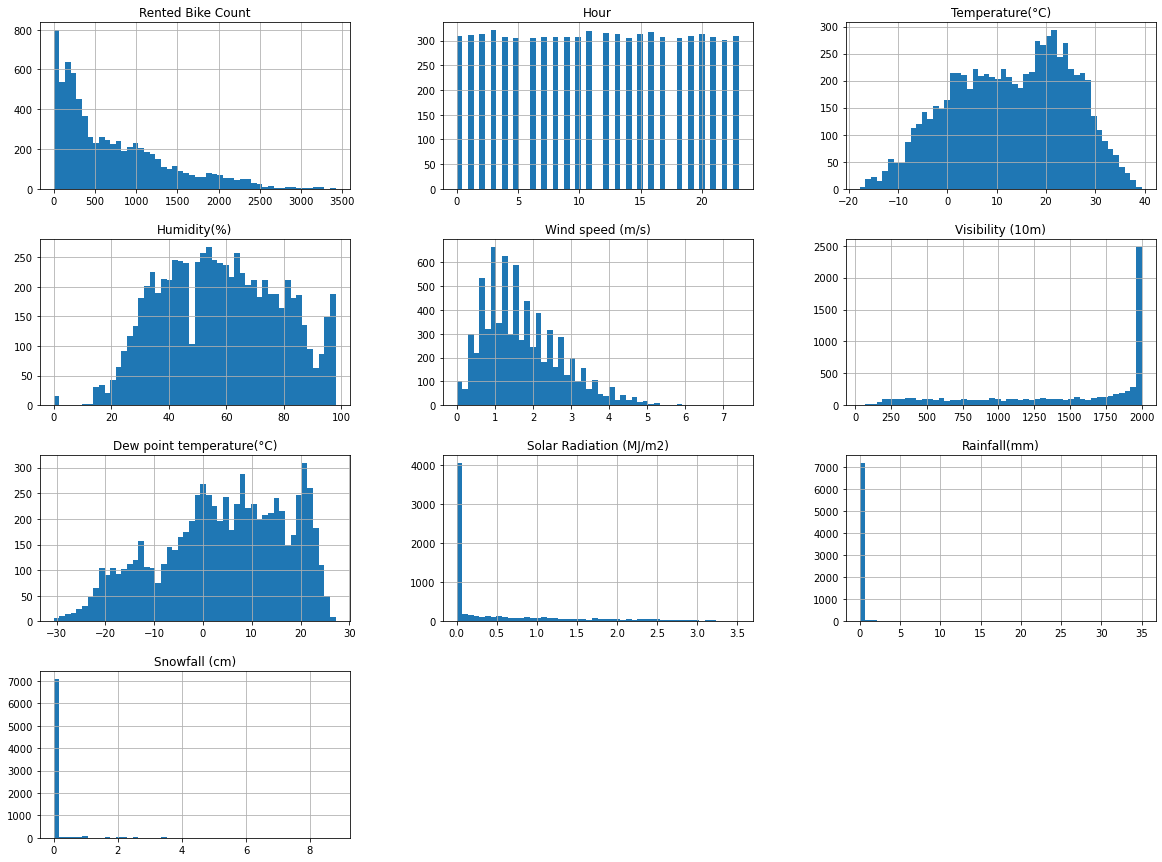

In [19]:
#frist look at histograms for each of the continuous attributes

%matplotlib inline
import matplotlib.pyplot as plt
bs_train_set.hist(bins=50, figsize=(20,15))
plt.show()

Mean of Rented Bike Count: 705.8815471394037
Median of Rented Bike Count: 507.0
Mean of Wind Speed: 1.7277195809830799
Median of Wind Speed: 1.5


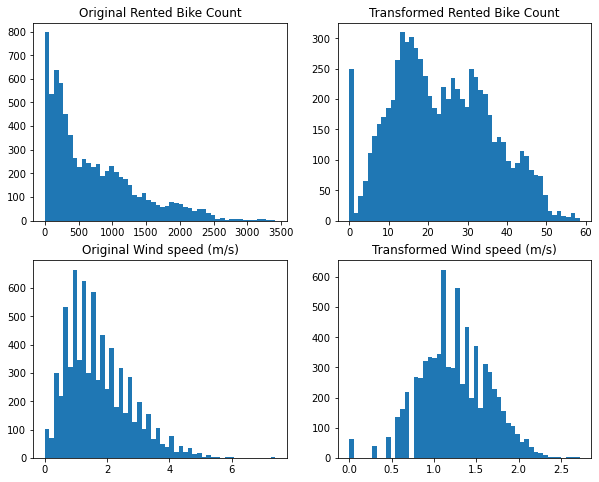

In [31]:
#1.Compute the mean and the median for the variables.
import numpy as np
print('Mean of Rented Bike Count:',np.mean(bs_train_set['Rented Bike Count']))
print('Median of Rented Bike Count:', np.median(bs_train_set['Rented Bike Count']))

print('Mean of Wind Speed:', bs_train_set['Wind speed (m/s)'].mean())
print('Median of Wind Speed:', bs_train_set['Wind speed (m/s)'].median())

#2. Transform the values using x, show the histograms

import matplotlib.pyplot as ply
plt.figure(figsize=(10,8))#size of plot
plt.subplot(221) #upper left
plt.hist(bs_train_set['Rented Bike Count'], bins=50)
plt.title("Original Rented Bike Count")

plt.subplot(222) #upper right
plt.hist(np.sqrt(bs_train_set['Rented Bike Count']), bins=50)
plt.title("Transformed Rented Bike Count")

plt.subplot(223) #below left
plt.hist(bs_train_set['Wind speed (m/s)'], bins=50)
plt.title("Original Wind speed (m/s)")

plt.subplot(224)
plt.hist(np.sqrt(bs_train_set['Wind speed (m/s)']), bins=50)
plt.title("Transformed Wind speed (m/s)")

plt.show()

# 3. From the histograms below we can easily know that x can be zero.
# log(0) is undefined

#we could do X = X + 1 in this dataset

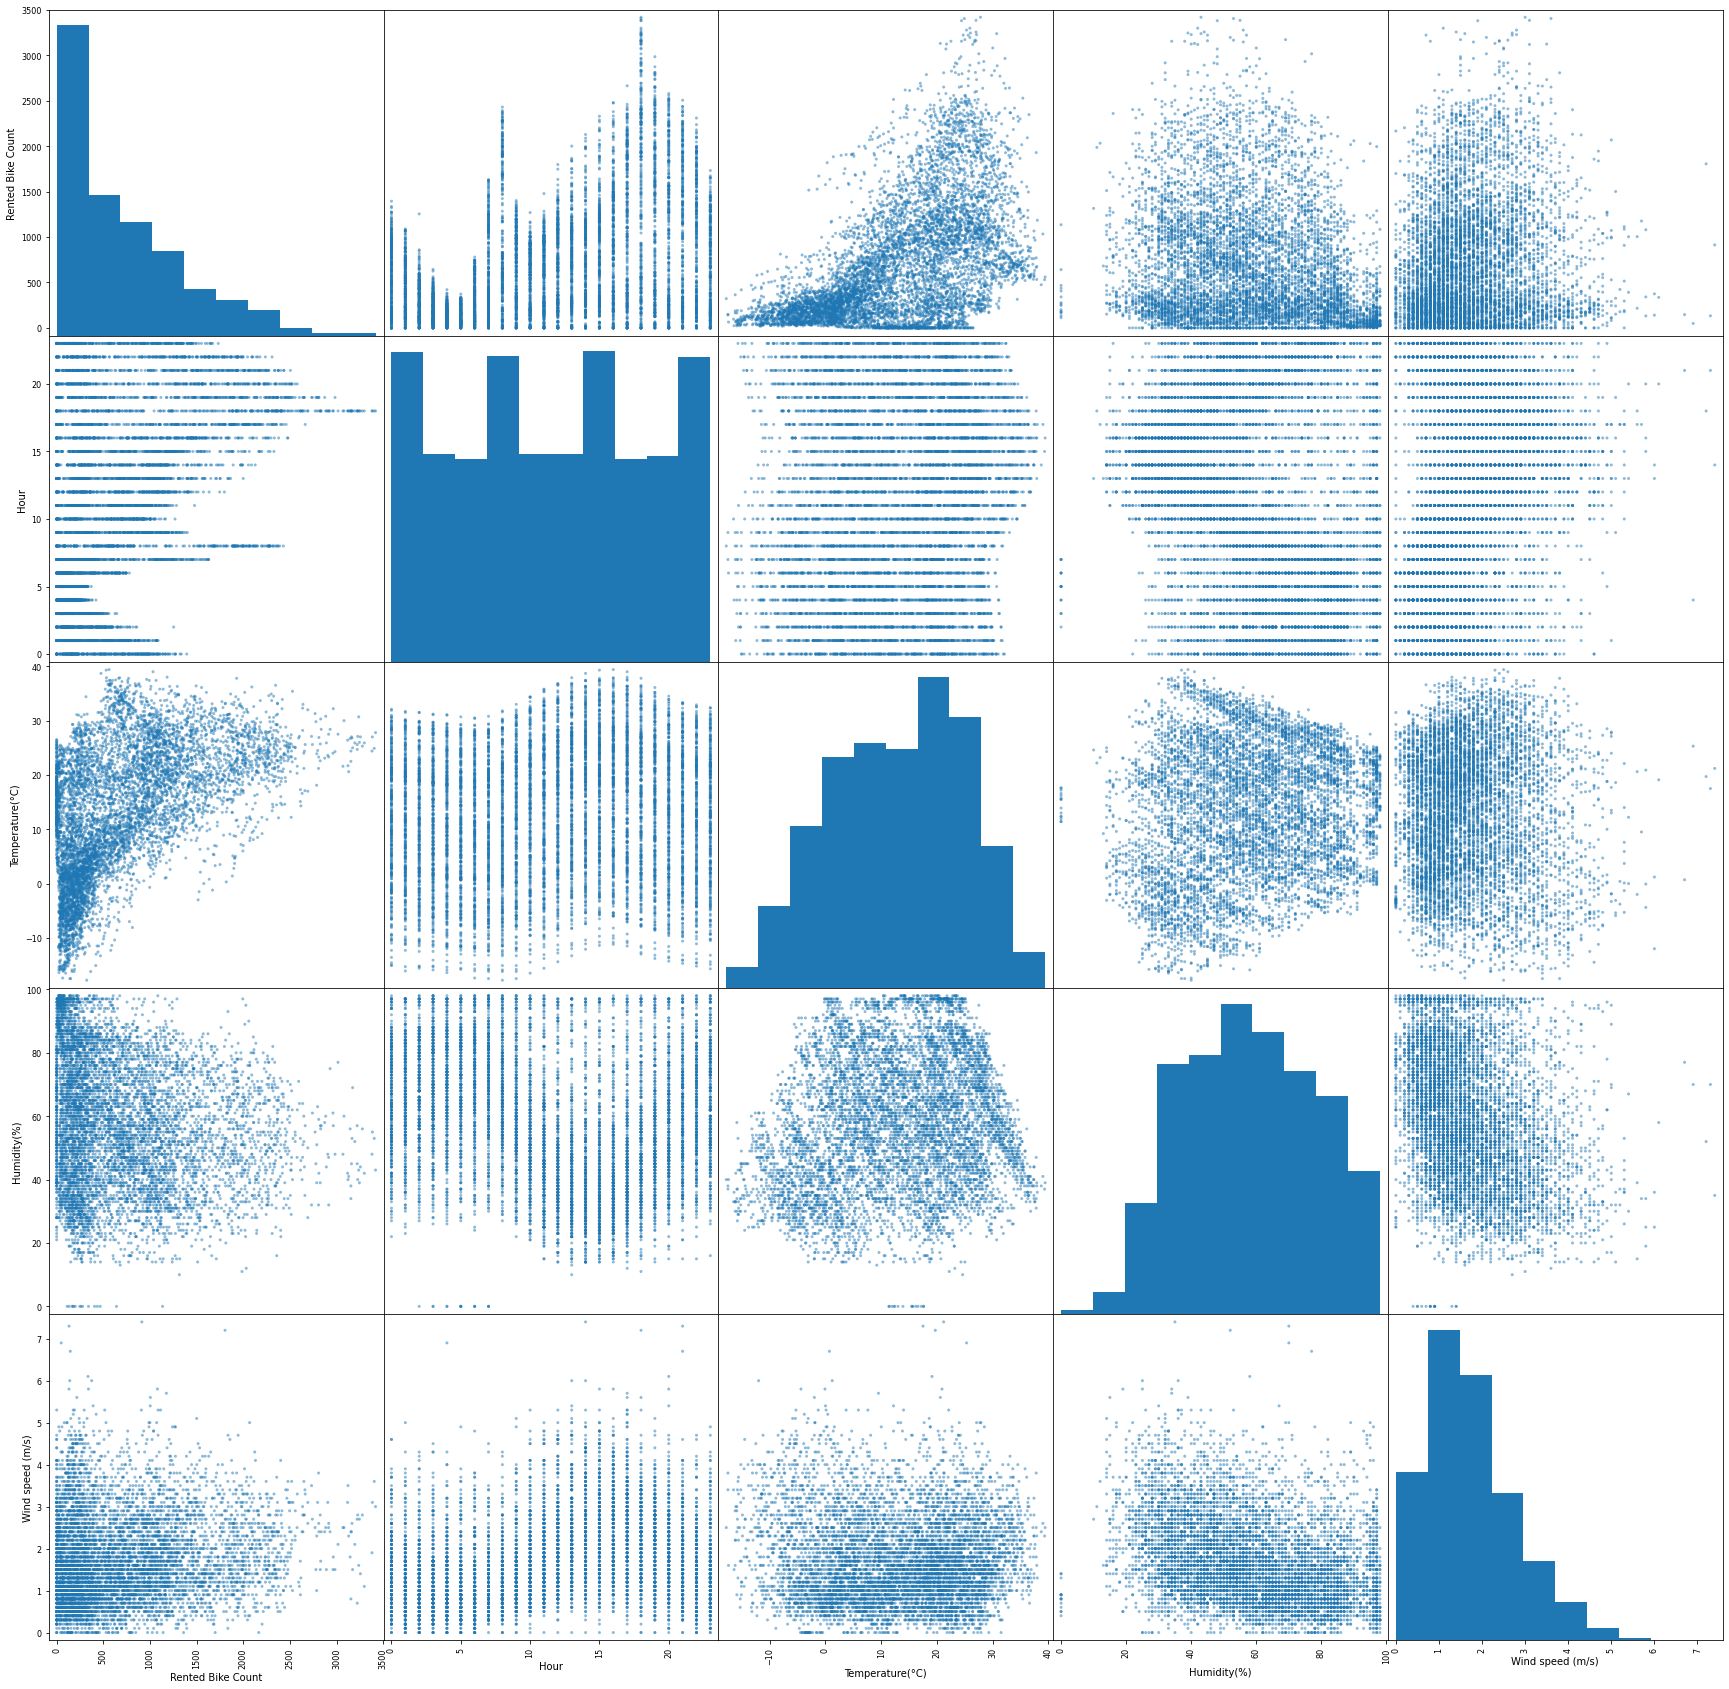

In [33]:
#scatter plot is a tool we can use to explore dependencies between the different variables.
#It contains plots of each variable against each other in dataset.

from pandas.plotting import scatter_matrix
attributes = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']
figscat = scatter_matrix(bs_train_set[attributes], figsize=(30,30))

In [34]:
#Correlation coefficients
#study the correlation coefficients between the numerical attributes and the Rented bike count
corr_matrix = bs_train_set.corr()
corr_matrix['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.537556
Hour                         0.417382
Dew point temperature(°C)    0.379268
Solar Radiation (MJ/m2)      0.256920
Visibility (10m)             0.203152
Wind speed (m/s)             0.116280
Rainfall(mm)                -0.124748
Snowfall (cm)               -0.142316
Humidity(%)                 -0.198830
Name: Rented Bike Count, dtype: float64

In [35]:
#transformed using sqrt() for RBC and Wind Speed
bs_train_set_copy = bs_train_set.copy()
bs_train_set_copy['Rented Bike Count'] = np.sqrt(bs_train_set_copy['Rented Bike Count'])
bs_train_set_copy['Wind speed (m/s)'] = np.sqrt(bs_train_set_copy['Wind speed (m/s)'])

corr_matrix_trans = bs_train_set_copy.corr()
corr_matrix_trans['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538991
Hour                         0.396535
Dew point temperature(°C)    0.370799
Solar Radiation (MJ/m2)      0.297958
Visibility (10m)             0.207771
Wind speed (m/s)             0.129867
Snowfall (cm)               -0.155572
Rainfall(mm)                -0.166085
Humidity(%)                 -0.226119
Name: Rented Bike Count, dtype: float64

In [36]:
#Prepare the data
#1.OneHotEncoder() 2.StandardScaler()

#Question 3
#preprocessing.Normalizer() allows to normalize samples individually to unit norm.
#preprocessing.LabelEncoder() can transform target labels with value between 0 and n_classes-1

#Question 4
#A pipline allow chaining multiple estimators into one. It is useful in a machine learning project
#because the different stages of the project can be put sequentially one after the other in a single instruction


In [39]:
#import transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']  
full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

In [40]:
#seperate the target feature from attributes

#X
bs_train_set_attributes = bs_train_set.drop('Rented Bike Count', axis=1)
#y
bs_train_set_labels = bs_train_set['Rented Bike Count']

In [41]:
#training data using fit_transform()

bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)

In [42]:
#Short-list models and fine-tune them

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bs_train_set_attributes_prepared, bs_train_set_labels)


LinearRegression()

In [44]:
#Fine-tuning the model
bs_train2_set, bs_val_set = train_test_split(bs_train_set, test_size = 0.15, random_state = 42)
bs_train2_set_attributes = bs_train2_set.drop('Rented Bike Count', axis=1)
bs_train2_set_labels = bs_train2_set['Rented Bike Count']
bs_val_set_attributes = bs_val_set.drop('Rented Bike Count', axis=1)
bs_val_set_labels = bs_val_set['Rented Bike Count']



In [45]:
#remove attributes: Rainfall, Snowfall
attributes_num_partial = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']  

partial_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num_partial),
    ("cat", OneHotEncoder(), attributes_cat),
])


In [46]:
bs_train2_set_attributes_prepared = partial_transform.fit_transform(bs_train2_set_attributes)

In [47]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(bs_train2_set_attributes_prepared, bs_train2_set_labels)

LinearRegression()

In [ ]:
#assess the performance of this model over the validation data

In [48]:
bs_val_set_no_RS_attributes = partial_transform.transform(bs_val_set_attributes)

In [49]:
#compute the predictions
bs_val_set_predictions_mod = lin_reg_mod.predict(bs_val_set_no_RS_attributes)

In [50]:
#compute the RMSE obtained with this predictive model
from sklearn.metrics import mean_squared_error
import numpy as np
error_mod = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions_mod))
error_mod

414.64885759078004

In [51]:
bs_train2_set_all_attributes_prepared = full_transform.fit_transform(bs_train2_set_attributes)

In [52]:
#create a new linear regression model
lin_reg = LinearRegression()
lin_reg.fit(bs_train2_set_all_attributes_prepared, bs_train2_set_labels)

LinearRegression()

In [53]:
bs_val_set_all_attributes = full_transform.transform(bs_val_set_attributes)

In [56]:
bs_val_set_all_predictions = lin_reg.predict(bs_val_set_all_attributes)

In [58]:
error = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_all_predictions))
error

412.71414519285656

In [ ]:
#We conclude from this that the variables Rainfall and Snowfall actually help to slightly improve the predictions.

In [114]:
#Question 5
Q5_bs_train2_set_attributes = bs_train2_set_attributes.copy()
Q5_bs_train2_labels = bs_train2_set_labels.copy()

Q5_bs_val_set_attributes = bs_val_set_attributes.copy()
Q5_bs_val_set_labels = bs_val_set_labels.copy()

Q5_bs_train2_set_attributes['Wind speed (m/s)'] = np.sqrt(Q5_bs_train2_set_attributes['Wind speed (m/s)'])
Q5_bs_val_set_attributes['Wind speed (m/s)'] = np.sqrt(Q5_bs_val_set_attributes['Wind speed (m/s)'])

In [115]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Normalizer

Q5_attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
Q5_attributes_num1 = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']
Q5_attributes_num2 = ['Rainfall(mm)', 'Snowfall (cm)']
WindSpeed = ['Wind speed (m/s)']
Q5_transform = ColumnTransformer([
    ("WindSpeed", StandardScaler(), WindSpeed),
    ("num1", Normalizer(), Q5_attributes_num1),
    ("num2", KBinsDiscretizer(n_bins=2), Q5_attributes_num2),
    ("cat", OneHotEncoder(), Q5_attributes_cat),
])

In [116]:
Q5_bs_train2_set_transformed = Q5_transform.fit_transform(Q5_bs_train2_set_attributes)

/Users/achui/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/achui/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [117]:
Q5_lin_reg_model = LinearRegression()
Q5_lin_reg_model.fit(Q5_bs_train2_set_transformed, Q5_bs_train2_labels)

LinearRegression()

In [118]:
Q5_bs_val_set_transformed = Q5_transform.transform(Q5_bs_val_set_attributes)
Q5_bs_val_set_predictions = Q5_lin_reg_model.predict(Q5_bs_val_set_transformed)

In [120]:
Q5_error = np.sqrt(mean_squared_error(Q5_bs_val_set_labels,Q5_bs_val_set_predictions))
Q5_error

470.9152129950519

In [122]:
bs_test_set_attributes = bs_test_set.drop('Rented Bike Count', axis=1)
bs_test_set_labels = bs_test_set['Rented Bike Count']

In [123]:
bs_test_set_attributes_prepared = full_transform.transform(bs_test_set_attributes)

In [125]:
bs_test_set_predictions = lin_reg.predict(bs_test_set_attributes_prepared)

In [127]:
error_test = np.sqrt(mean_squared_error(bs_test_set_labels, bs_test_set_predictions))
error_test

433.2831308385468